<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Regression method to predict Avacado Price

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Applying Regression Models](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section403)<br>
    - 4.2 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.3 [Using the Model for Prediction](#section407)<br>


<a id=section1></a>

### __1. Problem Statement__

The goal is to predict Average price of avocado using best regression model.

In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).


Our target variable is "AveragePrice".


### __2. Data Loading and Description__

- The dataset containing all the necessary information about the Avacado's.

- The dataset contains weekly retail scan data for National Retail Volume (units) and price.

- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

- The dataset is divided into two parts: Train and Test sets.

  Train Set:
    The train set contains 14599 rows and 14 columns.
    The last column AveragePrice is the target variable.

  Test Set:
    The test set contains 3650 rows and 13 columns.
    The test set doesn’t contain the AveragePrice column.
    It needs to be predicted for the test set.

- The variables of the dataset are the following:
    Categorical: ‘region’,’type’
    Date: ‘Date’
    Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
    Target:‘AveragePrice’
    

The Dataset contains the following columns:

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
Id|Unique identity of each observation|
Date|The date of the observation|
AveragePrice|The average price of a single avocado|
Total Volume|Total number of avocados sold.|
4046|Total number of avocados with PLU 4046 sold.|
4225|Total number of avocados with PLU 4770 sold.|
4770|Total number of avocados with PLU 4770 sold.|
Total Bags|Total number of bags sold.|
Small Bags|Total number of small bags sold.|
Large Bags|Total number of large bags sold.|
sugarpercent|Total number of extra-large bags sold.|
type|Type of an avocado (conventional or organic).|
year|The year of observation.|
Region|The city or region of the observation.|


#### Importing packages                                          

In [76]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [77]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [78]:
# Reading Train and Test data Separately
df = pd.read_csv("https://raw.githubusercontent.com/sreeman-maddineni/Avacado_price_pred/main/avocado_train.csv")     # Importing training dataset using pd.read_csv
df_test  = pd.read_csv("https://raw.githubusercontent.com/sreeman-maddineni/Avacado_price_pred/main/avocado_test.csv")     # Importing 

In [79]:
df.head(3)

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.0,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.0,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.0,0.0,conventional,2017,Orlando


In [80]:
df.shape

(14599, 14)

In [81]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


**Observation:**

By observing the data
- We dont have any missing values.
- The ID is not required we can drop it by keeping in another dataframe.

let's do some Feature Engineering on the Date Feature in pre-processing later.

In [82]:
df.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Observation:**

The average price of avocado is 1.409 and minimum 0.44 maximum is 3.25

## __Profiling__

In [83]:
#!pip3 install pandas_profiling --upgrade

In [84]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(output_file="avocado_before_preprocessing.html")

 

## __3. Preprocessing the data__

- Dealing with missing values<br/>
    - Dropping missing entries
    - Replacing missing values
    - Dropping the columns

In [85]:
df.duplicated().sum()

0

**Observation:**

- Dataset does not have any duplicated and missing values.

In [86]:
df.isna().sum()

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

**Observation:**
- We can see that no missing values exist in dataset

In [87]:
# divide the DS into numerical , categorical
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds = df.select_dtypes(exclude=numerics) # all categorical datatypes

In [88]:
#Copying ID as Backup before dropping
df_ID=df[['Id']].copy()

df=df.drop('Id',axis=1)


Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [89]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Doing Same Procedure on Test Data

In [90]:
df_test.duplicated().sum()

0

In [91]:
# divide the DS into numerical , categorical
numeric_ds_test = df_test.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds_test = df_test.select_dtypes(exclude=numerics) # all categorical datatypes

In [92]:
df_test_ID=df_test[['Id']].copy()

df_test=df_test.drop('Id',axis=1)

In [93]:
df_test['Date']=pd.to_datetime(df_test['Date'])
df_test['Month']=df_test['Date'].apply(lambda x:x.month)
df_test['Day']=df_test['Date'].apply(lambda x:x.day)

## __EDA__

Doing EDA on Train data

The type column in dataset regarding: Organic vs Conventional : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising . We will see this can be useful to us.

Q.1 Which type of Avocados are more in demand (Conventional or Organic)?


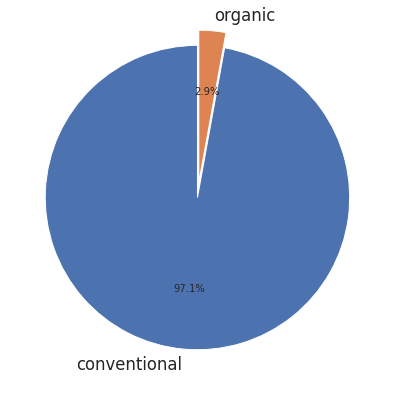

In [94]:

#py.init_notebook_mode()
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']
explode = (0, 0.1)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = labels,autopct='%1.1f%%',startangle=90,explode=explode)
 
plt.show()
 

**Observation:**

Just over 2.9% of our dataset is organic. So looks like Conventional is in more demand. Now, let's look at the average price distribution

Q.2 In which range Average price lies, what is distribution look like?

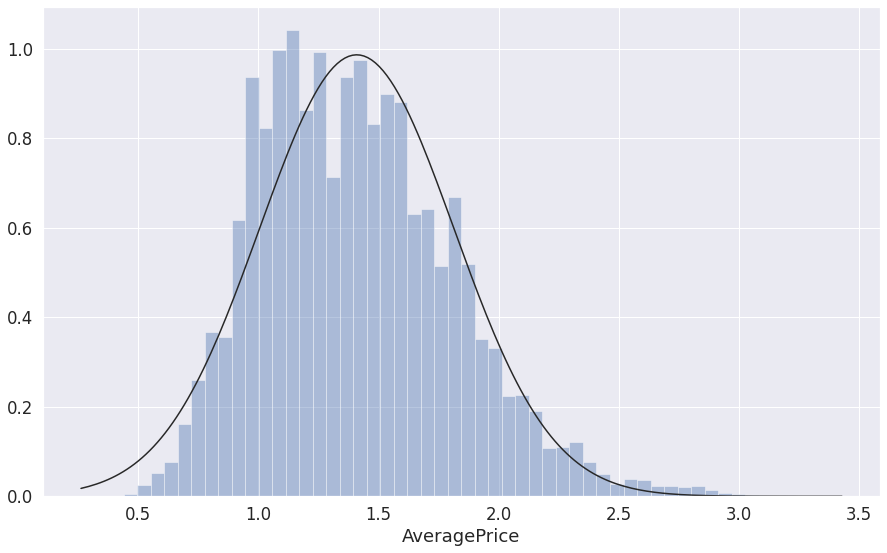

In [95]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

**Observation:**

- Average Price distribution shows that for most cases price of avocado is between 1.0, 1.6.
- Let's look at average price of conventional vs. organic.

Q.3 How Average price is distributed over the months for Conventional and Organic Types?

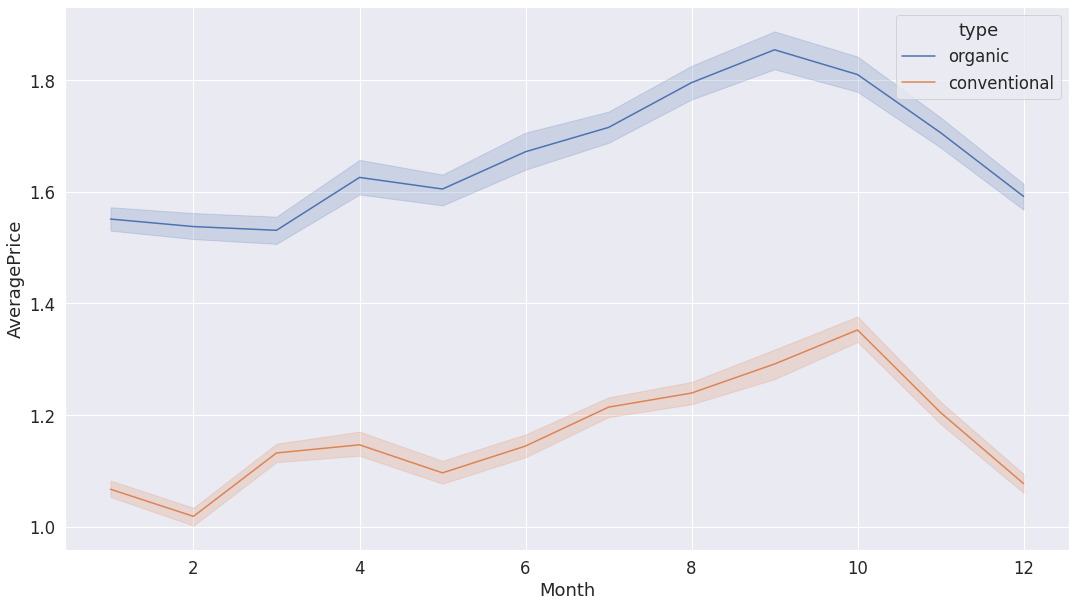

In [96]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

**Observation:**

Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

Now lets plot Average price distribution based on region

Q.4 What are TOP 5 regions where Average price are very high?


Text(0.5, 1.0, 'Average Price of Avocado According to Region')

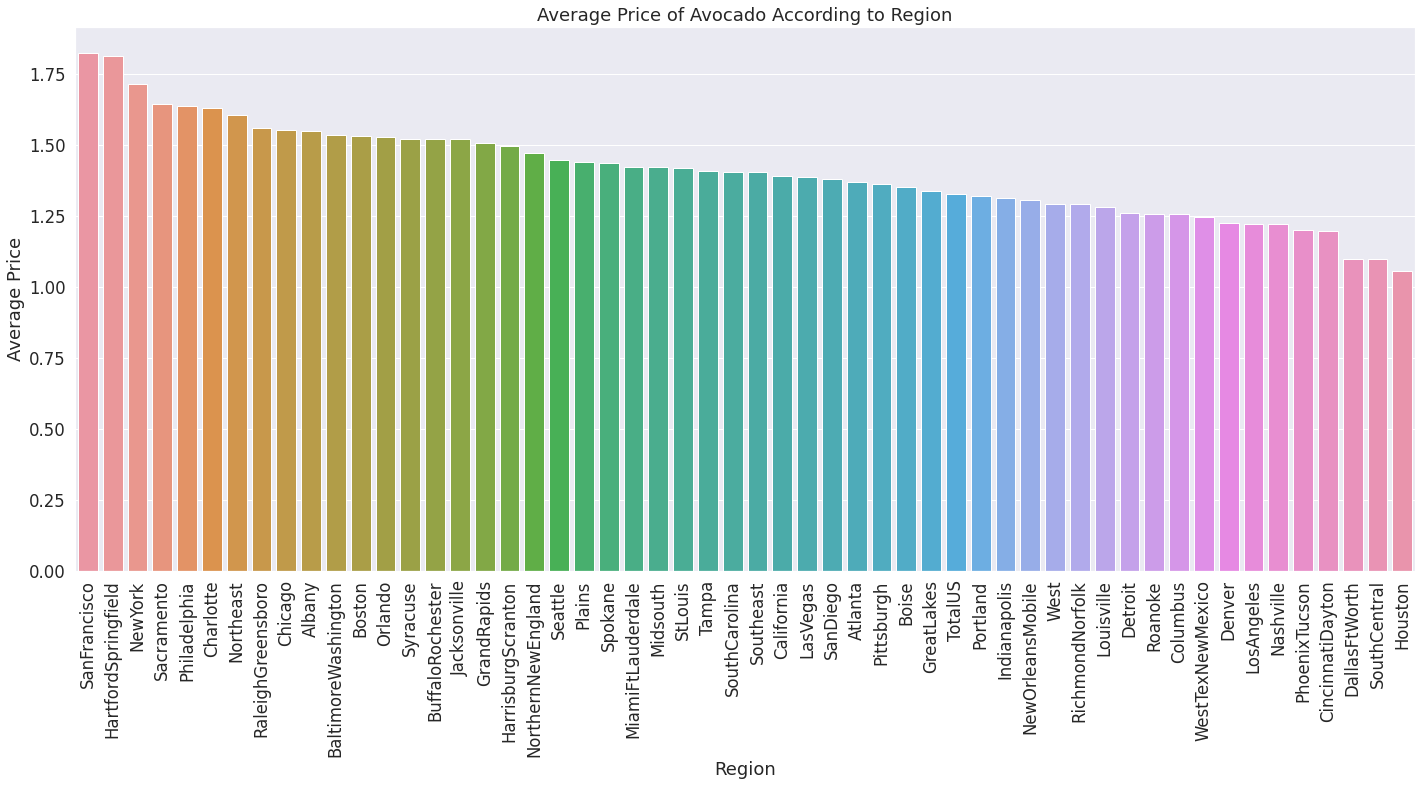

In [97]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

**Observation:**

Looks like these region are where price is very high
- SanFrancisco
- HartfordSpringfield
- NewYork
- Sacramento
- Philadelphia

Q.5 What are TOP 5 regions where Average consumption is very high?


Text(0.5, 1.0, 'Average of Total Volume According to Region')

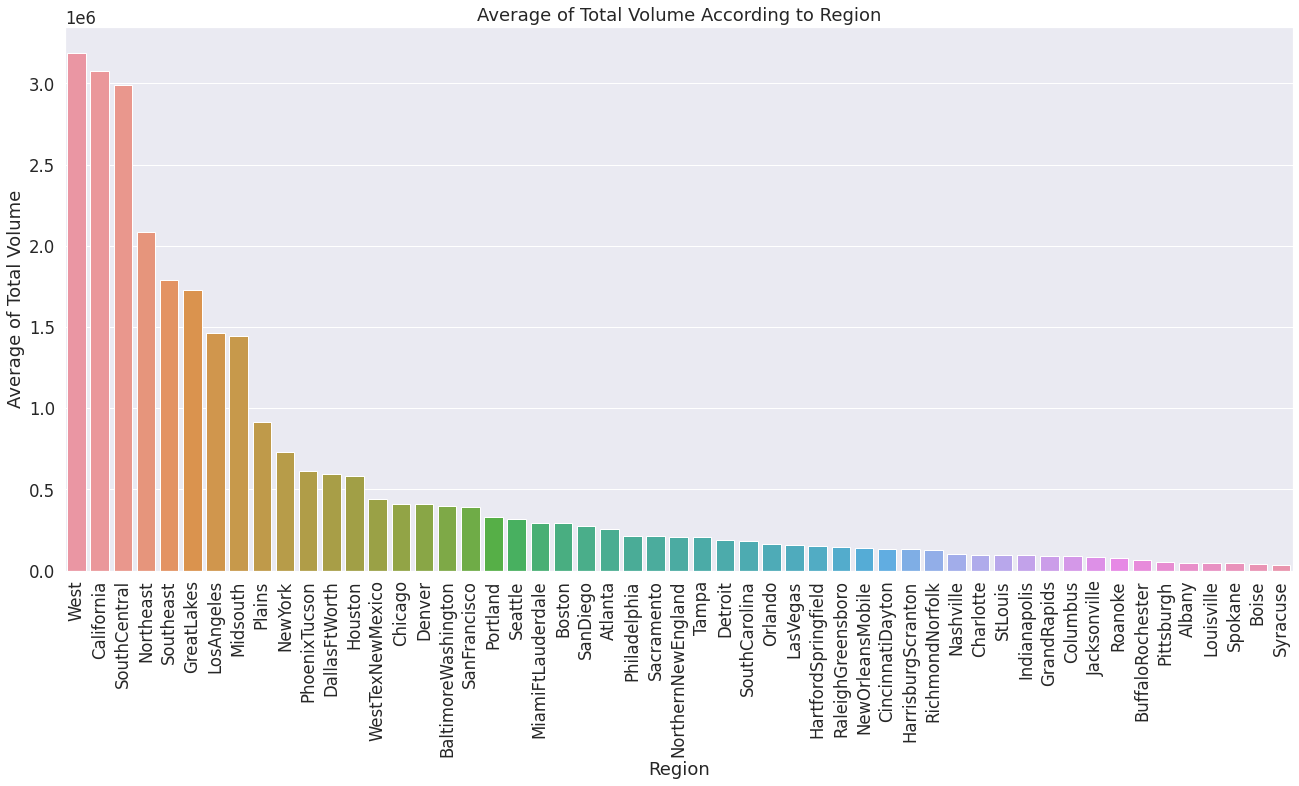

In [98]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

**Observation:**

Looks like these region are where Consumption is very high
- West
- California
- SouthCentral
- Northeast
- Southeast

Q.6 In which year and in wich region check the highest Average price


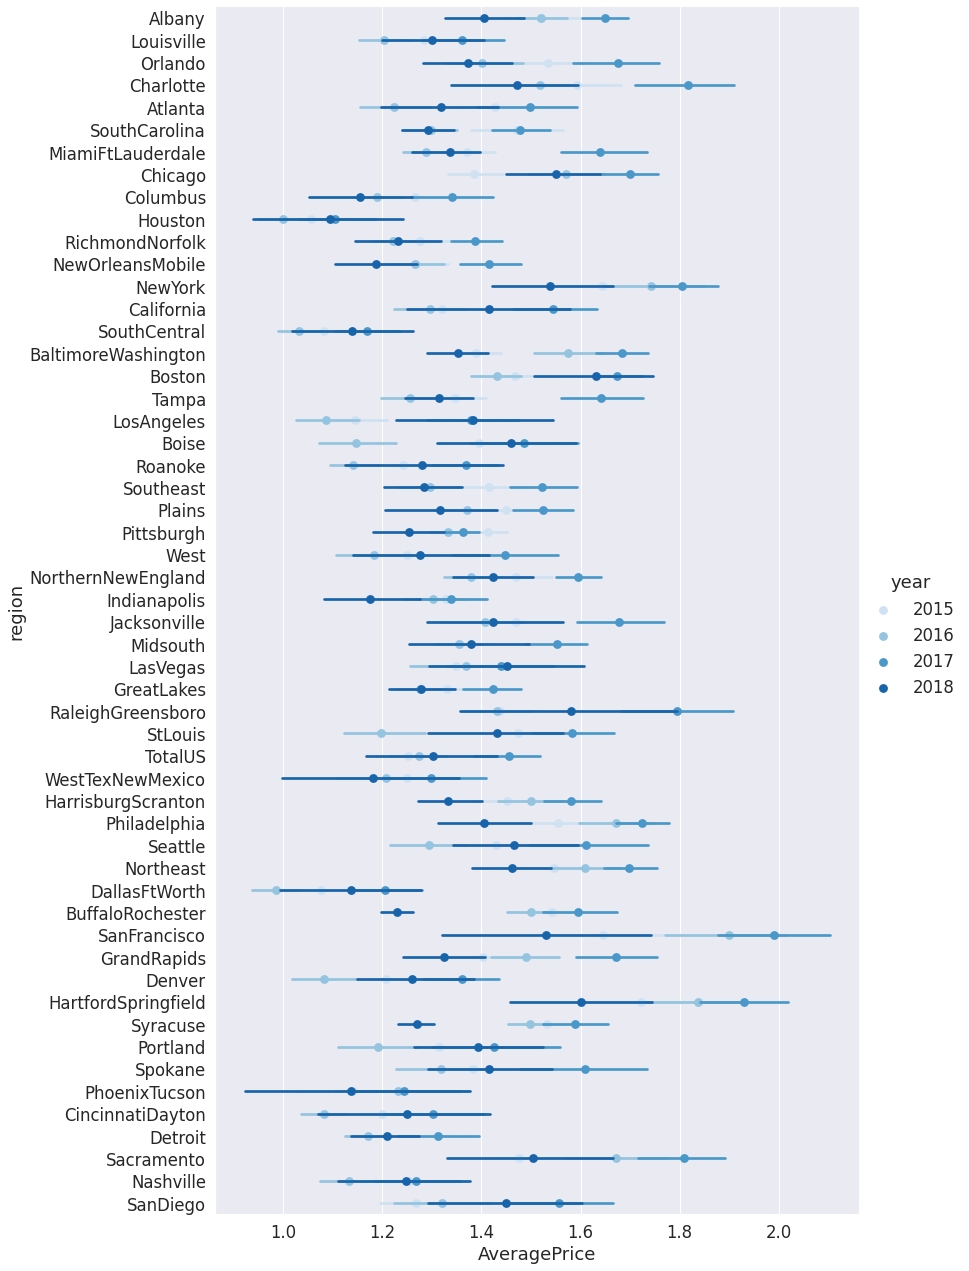

In [99]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

**Observation:**

- The price not only depends on the type, but also on the region.
- Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. 

Q.7 How price is distributed over the date column?

Plot Avocado's Average Price through the Date column



Text(0.5, 1.0, 'Average Price')

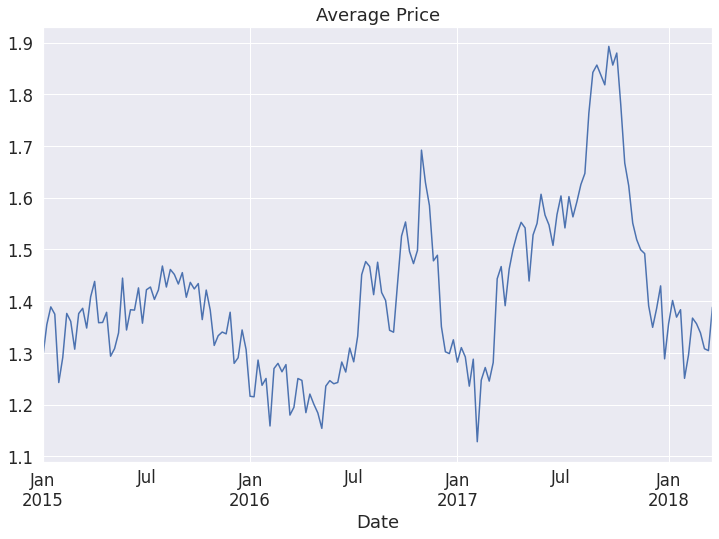

In [100]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

**Observation:**

- This also shows there was a huge hike in prices after July 2017 and before Jan 2018. This was also confirmed in earlier graph too.

Q.8 How dataset features are correlated with each other?


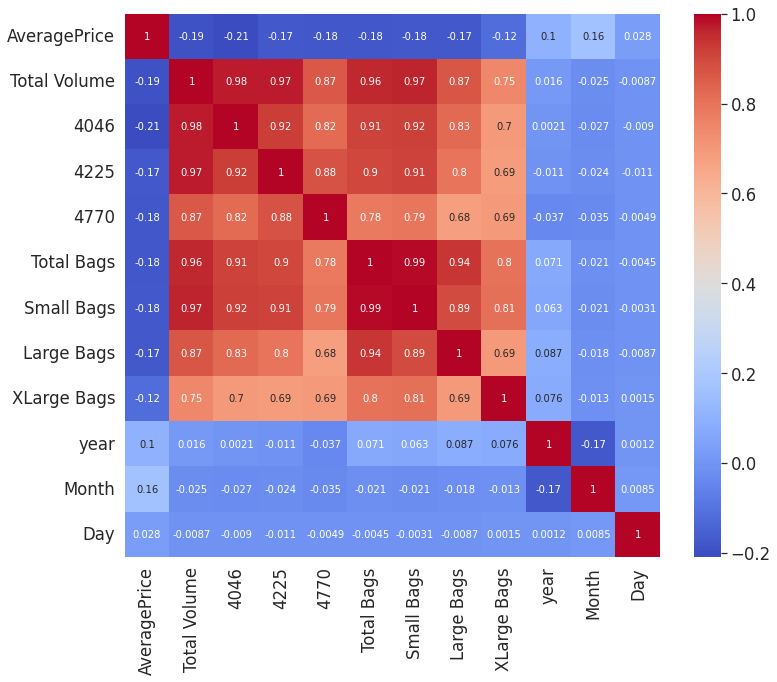

In [101]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, annot_kws={"size":10})

**Observation:**

- All the Features are not correleted with the Average Price column, instead most of them are correlated with each other.  

- Total Volume  and Total Bags also have a strong correlation.

## __4.Applying Models__

**__Feature Engineering for Model building__


In [102]:
df['region'].nunique()


54

In [103]:
df['type'].nunique()


2

**Observation:**

- As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

## Creating dummy variables for our categorical variables

In [104]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)


In [105]:
df_final.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,2017,8,20,1
1,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,2017,11,12,0
2,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,2017,2,12,0
3,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,2016,5,22,1
4,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,2016,1,10,1


For TestData

In [106]:
dftest_final=pd.get_dummies(df_test.drop(['region','Date'],axis=1),drop_first=True)

In [107]:
dftest_final.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,2015,5,3,1
1,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,2017,10,8,1
2,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,2017,7,2,0
3,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,2017,5,14,0
4,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,2015,12,13,1


In [108]:
X_test_org=dftest_final.iloc[:,:13]
#y_test=dftest_final['AveragePrice']

In [109]:
X_test_org.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,2015,5,3,1
1,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,2017,10,8,1
2,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,2017,7,2,0
3,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,2017,5,14,0
4,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,2015,12,13,1


* __Model Selection/Predictions__

- Data is ready. We apply our model Linear Regression because our Target variable 'AveragePrice' is continuous.
- Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.



####Q.1 Is Linear Regression good? Lets find out.


In [110]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [112]:
lr.fit(X,y)
pred=lr.predict(X_test)

In [113]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22874644551682252
MSE: 0.08916658707002453
RMSE: 0.2986077478399121


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.

Lets plot the y_test vs the predictions


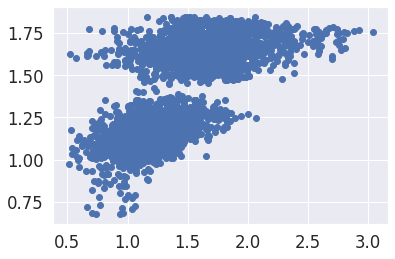

In [114]:
plt.scatter(x=y_test,y=pred)

As we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data

Lets try working with the Decision Tree Regression model


####Q.2 Are we good with Decision Tree Regression? Lets find out.

In [115]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

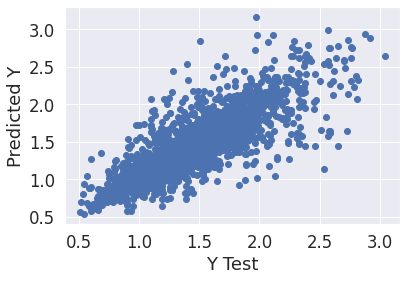

In [116]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.14144520547945205
MSE: 0.048308904109589046
RMSE: 0.21979286637556972


RMSE is lower than the previous one we got with Linear Regression.

Now I am going to try one last model to see if I can improve my predictions for this data which is the RandomForestRegressor

####Q.3 Are we good with Random Forest Regressor? Lets find out.

In [118]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [119]:
pred_op=rdr.predict(X_test_org)

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10604722602739723
MSE: 0.023160968229452048
RMSE: 0.15218728011713742


As we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

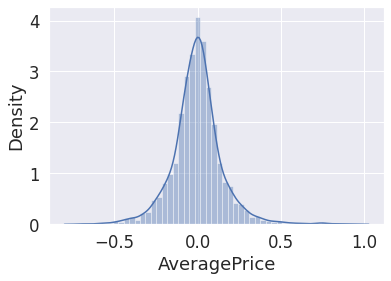

In [121]:
sns.distplot((y_test-pred),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Lets see final Actual Vs Predicted sample.

,Y Test,Pred
169,0.54,0.5599
8466,1.12,1.5511
3013,1.59,1.6457
1475,1.74,1.5773
13797,1.17,1.1438


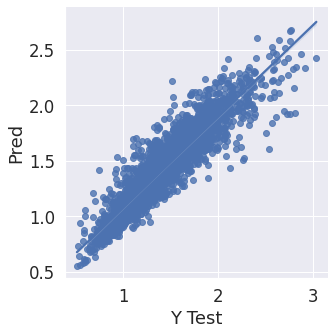

In [122]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [123]:
test_predictions = df_test_ID

In [124]:
test_predictions['predicted']=pred_op # predictions with Random forest

In [125]:
test_predictions.head(3)

,Id,predicted
0,11137,1.3017
1,16503,1.5858
2,6438,1.2104


In [126]:
test_predictions.to_csv('submission.csv', index=False, header=False)

##**Conclusions**

- 2017 a good year for avocados: Based on this trend, we can see that 2017 was a good year for avocados.

- At the end of 2017 we can see a large drop in prices, at the same time there is an increasing amount of volume of avocados in the market. 

- Price peaks occur between the months of September and October.Best to buy before for less.

- Each volume peak is a signal for an upcoming drop in avocado prices.

- We have noticed that organic avocados are much more expensive than conventional avocados.

- We have seen the impact of columns like type, year/date on the Average price increase/decrease rate.

- We came to know through analysis which model will be work with better accuracy with the help of low RMSE scores.

- Random forest Regressor given a good result out of all tried. RMSE score is very low comparitive to other models. RMSE  tells you how concentrated the data is around the line of best fit.

 